# Credentials etc

In [116]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_00523e55e0a5426b9e750aa61c129a54 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=<**REPLACE_WITH_YOUR_IBM_API_KEY_ID**>',
    ibm_auth_endpoint="https://iam.eu-gb.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')


In [117]:

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_1 = {
    'IAM_SERVICE_ID': ''****',
    'IBM_API_KEY_ID': <**REPLACE_WITH_YOUR_IBM_API_KEY_ID**>',
    'ENDPOINT': 'https://s3.eu-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.eu-gb.bluemix.net/oidc/token',
    'BUCKET': '<**REPLACE_WITH_YOUR_BUCKET_ID**>',
    'FILE': 'diabetes(1).csv'
}


# Load the dataset in a dataframe

In [3]:
nycdf = pd.read_csv("https://data.cityofnewyork.us/resource/fhrw-4uyv.csv?$limit=100000000&Agency=HPD&$select=created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status", nrows=10000000, parse_dates=['created_date','closed_date']) 

In [118]:
nycdf.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2020-01-12 13:51:29,45371335,HEAT/HOT WATER,10025.0,244 WEST 109 STREET,WEST 109 STREET,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.802991,-73.965787,NaT,RESIDENTIAL BUILDING,Open
1,2020-01-12 12:31:46,45371926,HEAT/HOT WATER,10459.0,823 HOME STREET,HOME STREET,ADDRESS,BRONX,The following complaint conditions are still o...,BRONX,40.827783,-73.899100,NaT,RESIDENTIAL BUILDING,Open
2,2020-01-12 10:01:37,45370254,HEAT/HOT WATER,10460.0,1904 VYSE AVENUE,VYSE AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.840133,-73.883479,2020-01-12 18:26:48,RESIDENTIAL BUILDING,Closed
3,2020-01-12 03:50:59,45372913,HEAT/HOT WATER,10009.0,176 EAST 3 STREET,EAST 3 STREET,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.723153,-73.984130,NaT,RESIDENTIAL BUILDING,Open
4,2020-01-12 20:55:33,45372934,HEAT/HOT WATER,11373.0,89-21 ELMHURST AVENUE,ELMHURST AVENUE,ADDRESS,Elmhurst,The complaint you filed is a duplicate of a co...,QUEENS,40.747420,-73.876853,NaT,RESIDENTIAL BUILDING,Open


Data is loaded on tuesday the 14th of January 2020 when this is written

# Subset data with the complainttypes

In [5]:
compl=nycdf['complaint_type'].value_counts()
compl

HEAT/HOT WATER            1243231
HEATING                    887869
PLUMBING                   709961
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       449751
PAINT - PLASTER            361257
PAINT/PLASTER              345721
ELECTRIC                   306777
NONCONST                   260890
DOOR/WINDOW                204515
WATER LEAK                 192919
GENERAL                    150702
FLOORING/STAIRS            137112
APPLIANCE                  112358
HPD Literature Request      52830
SAFETY                      51315
OUTSIDE BUILDING             7120
ELEVATOR                     6692
Unsanitary Condition         5499
CONSTRUCTION                 5078
General                      1163
Safety                        424
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       4
Electric                        1
Mold          

From the above df it is clear that HEAT/HOT WATER and HEATING are the two main areas to focus on.

In [53]:
#Lets set the complainttypes to only be HEAT/HOT WATER and HEATING
array = ["HEAT/HOT WATER", "HEATING"]
heatdf=nycdf.loc[nycdf['complaint_type'].isin(array)]
heatdf=heatdf.loc[heatdf['borough']=='BRONX']
heatdf=heatdf.dropna()
heatdf.tail()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
5994092,2019-10-15 22:13:11,44063661,HEAT/HOT WATER,10452.0,957 WOODYCREST AVENUE,WOODYCREST AVENUE,ADDRESS,BRONX,The complaint you filed is a duplicate of a co...,BRONX,40.831527,-73.928863,2019-10-16 02:07:21,RESIDENTIAL BUILDING,Closed
5994093,2019-10-15 08:25:25,44063670,HEAT/HOT WATER,10470.0,707 EAST 242 STREET,EAST 242 STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.905645,-73.849026,2019-10-16 21:55:24,RESIDENTIAL BUILDING,Closed
5994094,2019-10-15 09:32:54,44063671,HEAT/HOT WATER,10458.0,2786 BAINBRIDGE AVENUE,BAINBRIDGE AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.868017,-73.888941,2019-10-16 19:02:48,RESIDENTIAL BUILDING,Closed
5994098,2019-10-15 06:09:28,44063692,HEAT/HOT WATER,10461.0,3555 BRUCKNER BOULEVARD,BRUCKNER BOULEVARD,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.847809,-73.827481,2019-10-15 16:12:58,RESIDENTIAL BUILDING,Closed
5994100,2019-10-15 14:07:34,44063726,HEAT/HOT WATER,10467.0,66 WEST GUN HILL ROAD,WEST GUN HILL ROAD,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.883207,-73.884279,2019-10-16 19:10:19,RESIDENTIAL BUILDING,Closed


# Question 3 
Does the Complaint Type, that you have identified in response to Question 1, have an obvious relationship with any particular characteristic or characteristics of the Houses?

We need to load the data of the specifics of the houses form the parameters provided

In [120]:
param = 'Address, BldgArea, BldgDepth, BuiltFAR, CommFAR, FacilFAR, Lot, LotArea, LotDepth, NumBldgs, NumFloors, OfficeArea, ResArea, ResidFAR, RetailArea, YearBuilt, YearAlter1, ZipCode, YCoord, XCoord'
paramlist = param.split(", ")

We need data from 5 different boroughs

In [121]:

body = client_00523e55e0a5426b9e750aa61c129a54.get_object(Bucket='capstonemoney-donotdelete-pr-wdjxei9egykqlz',Key='BX_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

bx = pd.read_csv(body)
bxpar = bx[paramlist]
bxpar = bxpar.dropna()
bxpar.head()


,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,0.0,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,1.0,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,2.0,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,5.0,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,5.0,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0


In [122]:

body = client_00523e55e0a5426b9e750aa61c129a54.get_object(Bucket='capstonemoney-donotdelete-pr-wdjxei9egykqlz',Key='BK_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

bk = pd.read_csv(body)
bkpar = bk[paramlist]
bkpar = bkpar.dropna()
bkpar.head()



,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
1,10 JAY STREET,163894,195.0,8.33,2.0,6.5,50,19682,207.25,1,10.0,147505,0,5.4,16389,1920,1994,11201.0,195989.0,987838.0
2,1 JOHN STREET,102534,0.0,0.00,2.0,0.0,7501,0,0.00,1,12.0,0,97848,0.0,4686,0,0,11201.0,195992.0,987624.0
3,JAY STREET,0,0.0,0.00,2.0,0.0,1,387060,469.00,15,0.0,0,0,0.0,0,0,0,11201.0,196151.0,988568.0
6,135 MARSHALL STREET,0,0.0,0.00,2.0,0.0,1,0,346.00,4,0.0,0,0,0.0,0,0,0,11201.0,196266.0,989346.0
8,1 HUDSON AVENUE,0,0.0,0.00,2.0,0.0,1,323307,657.00,15,0.0,0,0,0.0,0,0,0,11201.0,196040.0,989745.0


In [123]:

body = client_00523e55e0a5426b9e750aa61c129a54.get_object(Bucket='capstonemoney-donotdelete-pr-wdjxei9egykqlz',Key='MN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

mn = pd.read_csv(body)
mnpar = mn[paramlist]
mnpar = mnpar.dropna()
mnpar.head()



,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,1 GOVERNORS ISLAND,2725731,0.0,0.35,0.0,1.0,10,7736692,0.00,159,0.0,0,0,0.6,0,1900,0,10004.0,190225.0,979071.0
1,1 LIBERTY ISLAND,541886,0.0,1.00,0.0,1.0,101,541886,1046.00,11,0.0,0,0,0.6,0,1900,0,10004.0,190636.0,971677.0
2,1 ELLIS ISLAND,603130,0.0,0.22,0.0,1.0,201,2764190,0.00,13,0.0,0,0,0.6,0,1900,0,10004.0,193648.0,972790.0
5,4 SOUTH STREET,280000,210.0,1.34,2.0,6.5,1,209215,564.84,2,5.0,0,0,0.0,0,1908,2006,10004.0,194440.0,980670.0
6,10 SOUTH STREET,158197,270.0,0.83,3.4,10.0,2,191502,555.84,1,5.0,0,0,10.0,0,1900,2001,10004.0,194506.0,981037.0


In [124]:

body = client_00523e55e0a5426b9e750aa61c129a54.get_object(Bucket='capstonemoney-donotdelete-pr-wdjxei9egykqlz',Key='QN_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

qn = pd.read_csv(body)
qnpar = qn[paramlist]
qnpar = qnpar.dropna()
qnpar.head()



,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
1,2 STREET,0,0.0,0.00,0.0,10.0,3,21139,110.00,1,0.0,0,0,10.0,0,0,0,11101.0,209421.0,995513.0
2,1-50 51 AVENUE,136108,249.0,4.07,0.0,10.0,8,33454,184.48,1,5.0,0,0,10.0,0,2011,2011,11101.0,209867.0,995477.0
8,2 STREET,0,0.0,0.00,0.0,10.0,50,64242,336.76,0,0.0,0,0,10.0,0,0,0,11101.0,209090.0,995300.0
9,2 STREET,0,0.0,0.00,0.0,10.0,60,110906,340.92,0,0.0,0,0,10.0,0,0,0,11101.0,209442.0,995395.0
12,1-55 BORDEN AVENUE,228309,70.0,18.87,0.0,10.0,7501,12100,110.00,2,32.0,0,225416,10.0,2893,2013,0,11101.0,209799.0,995600.0


In [125]:

body = client_00523e55e0a5426b9e750aa61c129a54.get_object(Bucket='capstonemoney-donotdelete-pr-wdjxei9egykqlz',Key='SI_18v1.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

si = pd.read_csv(body)
sipar = si[paramlist]
sipar = sipar.dropna()
sipar.head()



,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord
0,139 BAY STREET,18965,50.0,3.32,3.4,4.8,10,5716,84.0,1,4.0,0,0,2.43,6965,1884,2000,10301.0,171951.0,963297.0
6,65 BAY STREET,10600,41.0,2.30,3.4,4.8,51,4600,70.0,1,3.0,9400,0,2.43,0,1923,1991,10301.0,172669.0,963320.0
7,45 BAY STREET,34800,100.0,2.45,3.4,4.8,55,14200,234.0,1,2.0,34800,0,2.43,0,1932,0,10301.0,172845.0,963387.0
8,5 BAY STREET,34941,41.0,0.10,3.4,4.8,60,334565,234.0,4,4.0,0,0,2.43,0,1931,0,10301.0,172927.0,963621.0
9,150 THE PROMENADE,2700,61.0,0.02,3.4,4.8,65,121810,0.0,2,3.0,0,0,2.43,0,1931,0,10301.0,172762.0,963871.0


lets merge the 5 datasets into one that covers the entire area we are interested in

In [126]:
dfs=[bxpar, bkpar, mnpar, qnpar, sipar]
nytot = pd.concat(dfs)
nytot.index =range(len(nytot.index))
nytot.shape


(835242, 20)

In [127]:
print(nytot.columns)
print(heatdf.columns)

Index(['Address', 'BldgArea', 'BldgDepth', 'BuiltFAR', 'CommFAR', 'FacilFAR',
       'Lot', 'LotArea', 'LotDepth', 'NumBldgs', 'NumFloors', 'OfficeArea',
       'ResArea', 'ResidFAR', 'RetailArea', 'YearBuilt', 'YearAlter1',
       'ZipCode', 'YCoord', 'XCoord'],
      dtype='object')
Index(['created_date', 'unique_key', 'complaint_type', 'incident_zip',
       'incident_address', 'street_name', 'address_type', 'city',
       'resolution_description', 'borough', 'latitude', 'longitude',
       'closed_date', 'location_type', 'status'],
      dtype='object')


Lets concatenate the houses characteristics dataframe with the incidents dataframe

In [128]:
dfmerge = nytot['Address'].isin(heatdf['incident_address'].unique())
nytot.loc[:,'target'] = dfmerge
nytot.head()

,Address,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,...,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,YCoord,XCoord,target
0,122 BRUCKNER BOULEVARD,0,0.0,0.00,5.0,6.5,1,15000,200.0,1,...,0,0,6.02,0,0,0,10454.0,232162.0,1005957.0,False
1,126 BRUCKNER BOULEVARD,752,16.0,0.05,5.0,6.5,4,13770,100.0,2,...,272,0,6.02,0,1931,1994,10454.0,232156.0,1006076.0,False
2,138 BRUCKNER BOULEVARD,39375,200.0,1.13,5.0,6.5,10,35000,200.0,1,...,0,0,6.02,0,1931,0,10454.0,232036.0,1006187.0,False
3,144 BRUCKNER BOULEVARD,12500,85.0,5.00,5.0,6.5,17,2500,100.0,1,...,0,12500,6.02,0,1931,2001,10454.0,232033.0,1006299.0,True
4,148 BRUCKNER BOULEVARD,8595,70.0,4.58,5.0,6.5,18,1875,75.0,1,...,0,6876,6.02,1719,1920,2009,10454.0,232040.0,1006363.0,True


Lets see potential correlations using pearson correlation

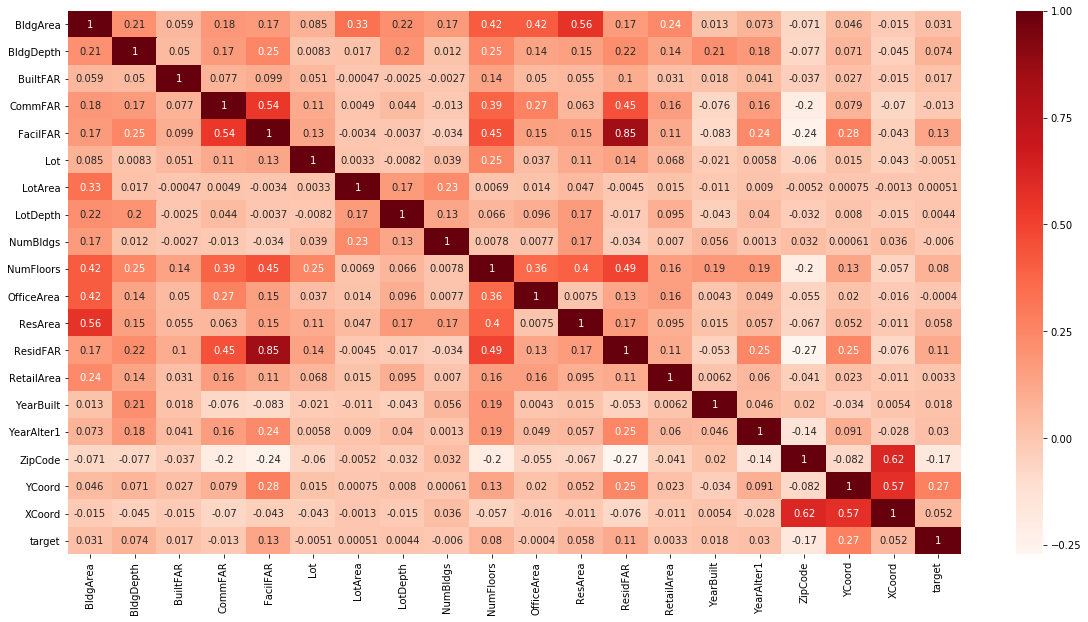

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,10))
cor = nytot.corr()
sns.heatmap(cor, annot = True, cmap=plt.cm.Reds)
plt.show()

Lets check the highest correlations:

In [115]:
cor_target = abs(cor["target"])
relevant_features = cor_target[cor_target>0.1]
relevant_features

FacilFAR    0.130746
ResidFAR    0.114090
ZipCode     0.170997
YCoord      0.273938
target      1.000000
Name: target, dtype: float64

From the values provided complaints regaring Heating and Heat/hot water have a correlation with FacilFAR, ResidFAR, ZipCode and Ycoord.